In [10]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from functions import *

%matplotlib inline

In [11]:
# initialize parameters and variables

mu1 = 30e9;
lambda1 = 30e9;

k = 0.2;

lambda2 = lambda1 + 2/3*(1-k)*mu1;  # eq 56
# mu2 = lambda1-lambda2+2*k*mu1; % eq 53
mu2 = k*mu1; # eq 54

K1 = lambda1 + 2/3*mu1;
K2 = lambda2 + 2/3*mu2;

ti = 0.2;
te = 0.4;

alpha1 = 36;
beta1 = 0;
alpha2 = 32;
beta2 = 1e-6;

c0 = 0.0;

t = np.linspace(0,1,1001);
YY = np.zeros(np.size(t));
c = np.zeros(np.size(t));
tauM = np.zeros(np.size(t));
P = np.zeros(np.size(t));
vp = np.zeros(np.size(t));
slp = np.zeros(np.size(t));

strainR_11 = 1e-3;
strainR_12 = 0.1e-3;
strainR_13 = 0.1e-3;
strainR_23 = 0;

strainR = np.array([[strainR_11,strainR_12,strainR_13],
           [strainR_12, 0, strainR_23],
          [ strainR_13, strainR_23, 0 ]]);

strain11 = 1e-11;
strain12 = -0.4e-11;
strain13 = -0.4e-11;
strain23 = 0;

strain0 = np.array([[strain11,strain12,strain13],
              [strain12,   0.0,   strain23],
              [strain13, strain23 ,0.0]]);

D = 50;

strain0.shape



(3, 3)

In [12]:
for i in range(1,t.size):
    
    c[i] = GetXi(c[i-1],t[i],t[i]-t[i-1],mu1,mu2,ti,te);
    
    mu_a =  (1-c[i])*mu2 + c[i] * mu1; #% eq 57
    K_a  =  (1-c[i])*K2 + c[i] * K1;  #% 

    M = mu1*mu2/mu_a;   # % eq. 45
    L = K1*K2/K_a -2/3 *mu1* mu2 /mu_a;
    
    strain = strain0 + (t[i]-t[i-1])*strainR;

    vp[i] = CalcVp(strain, strain0, D, t[i]-t[i-1]);   #% Vp = 2*strain_rate(II)*D
    
    slp[i] = slp[i-1] + vp[i]*(t[i]-t[i-1]);
    
    sigma,P[i] = StrainToStress(strain,L,M);
#     print(sigma);
    
    YY[i] = second(sigma);

    tau1 = calTauI(10,alpha1,beta1,YY[i]);
    tau2 = calTauI(3,alpha2,beta2, YY[i]);

    tauM[i] = ((1-c[i])/tau1/mu1 + c[i]/tau2/mu2)**-1.0; #% eq 49
#    sigma = np.matrix(sigma);
#     print(sigma);
#     print(np.eye(3));

    phi = 1/2*(sigma - sigma.trace()/3*np.eye(3))/tauM[i] ; #% eq 48
    
    strain_end = strain  +  (strainR - phi)*(t[i]-t[i-1]) ; # % eq 52
    
    strain0 = strain_end;
    
    

/Users/duoli/anaconda3/envs/obspy/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


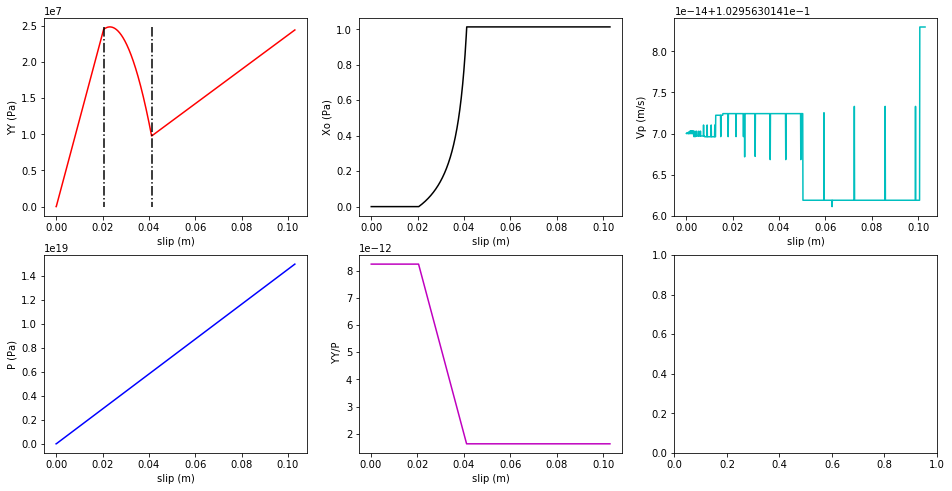

In [13]:
fig,ax = plt.subplots(ncols=3,nrows=2,figsize=(16,8));

#ax[0,0].set_title('Second invariant stress (Pa)');
ax[0,0].set_xlabel('slip (m)');
ax[0,0].set_ylabel('YY (Pa)');
ax[0,0].plot(slp,YY,'-r');

ax[0,0].plot(np.array([slp[200],slp[200]]),np.array([np.max(YY),np.min(YY)]),'-.k');
ax[0,0].plot(np.array([slp[400],slp[400]]),np.array([np.max(YY),np.min(YY)]),'-.k');


#ax[0,1].set_title('damage coeff.)');
ax[0,1].set_xlabel('slip (m)');
ax[0,1].set_ylabel('Xo (Pa)');
ax[0,1].plot(slp,c,'-k');


#ax[0,2].set_title('plastic slip rate');
ax[0,2].set_xlabel('slip (m)');
ax[0,2].set_ylabel('Vp (m/s)');
ax[0,2].plot(slp[1:],vp[1:],'-c');


#ax[1,0].set_title('hydrostatic stress (Pa)');
ax[1,0].set_xlabel('slip (m)');
ax[1,0].set_ylabel('P (Pa)');
ax[1,0].plot(slp,P,'-b');

#ax[1,1].set_title('equivalent friction coeff (YY/P)');
ax[1,1].set_xlabel('slip (m)');
ax[1,1].set_ylabel(' YY/P');
ax[1,1].plot(slp,YY/P,'-m');


